In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import load_boston
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
boston = load_boston()
X = pd.DataFrame(boston.data, columns=boston.feature_names) 
y = pd.Series(boston.target) 

In [6]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


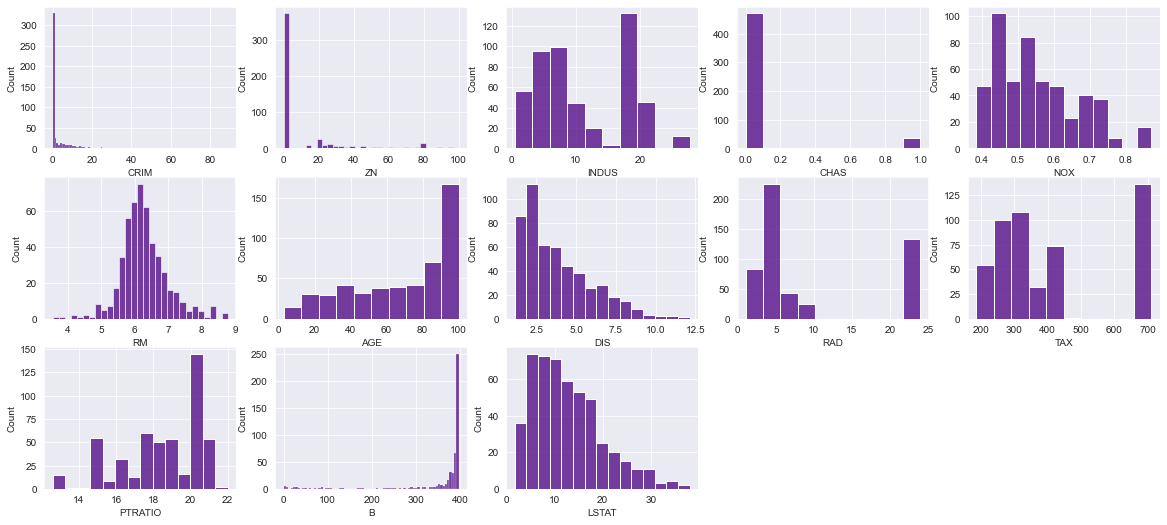

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,12))
i=0
for column in X:
    plot = fig.add_subplot(4,5,i+1)
    plot = sns.histplot(data = X, x = column, color = 'indigo')
    i = i+1

In [9]:
from sklearn.preprocessing import PowerTransformer
for c in X.columns:
    power = PowerTransformer(method='yeo-johnson', standardize=True)
    X[c] = power.fit_transform(X[[c]])

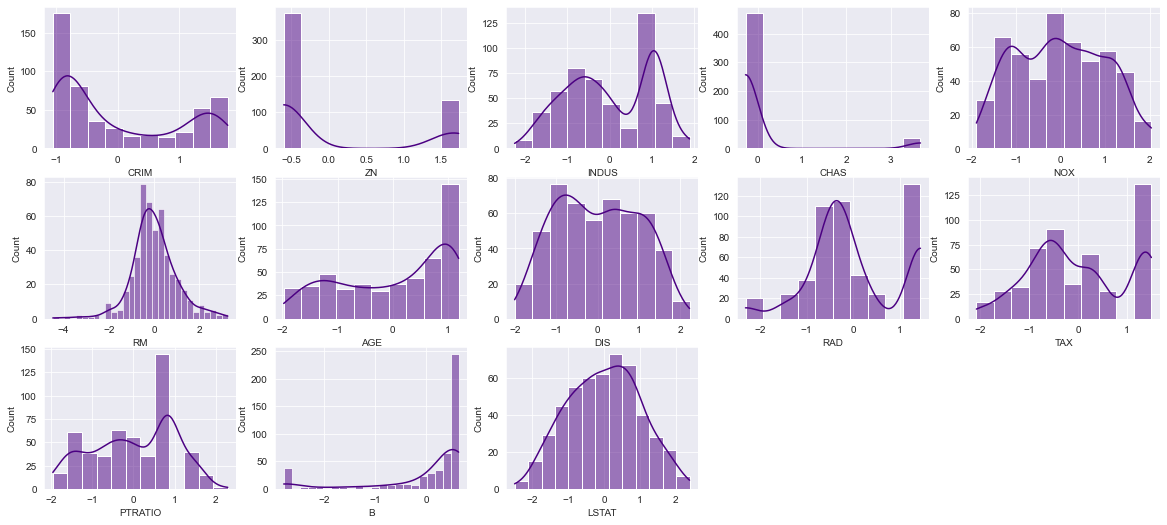

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,12))
i=0
for column in X:
    plot = fig.add_subplot(4,5,i+1)
    plot = sns.histplot(data = X, x = column, color = 'indigo',kde =True)
    i = i+1

In [17]:
y[1:10]

1    21.6
2    34.7
3    33.4
4    36.2
5    28.7
6    22.9
7    27.1
8    16.5
9    18.9
dtype: float64

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [24]:
gradientregressor = GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1.0)

In [20]:
model = gradientregressor.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
y_pred

array([13.25786872, 13.25786872, 22.76281608, 18.48723817, 43.97187631,
       22.76281608, 44.15079618, 32.45117118, 22.76281608, 36.15636484,
       31.00662729, 21.31827219, 22.76281608, 22.76281608, 21.31827219,
       13.25786872, 18.48723817, 22.76281608, 22.76281608, 36.15636484,
       22.76281608, 13.25786872, 21.31827219, 18.48723817, 13.25786872,
       21.31827219, 13.25786872, 36.15636484, 32.45117118, 22.76281608,
       22.76281608, 26.46800974, 26.46800974, 22.76281608, 21.31827219,
       22.76281608, 22.76281608, 22.76281608, 22.76281608, 22.76281608,
       22.76281608, 47.85598984, 47.85598984, 21.31827219, 22.76281608,
       26.46800974, 22.76281608, 21.31827219, 13.25786872, 18.48723817,
       13.25786872, 32.45117118, 13.25786872, 13.25786872, 22.76281608,
       13.25786872, 14.0001875 , 13.25786872, 22.76281608, 22.76281608,
       32.45117118, 22.76281608, 22.76281608, 13.25786872, 13.25786872,
       18.48723817, 22.76281608, 13.25786872, 22.76281608, 13.25

In [22]:
r2_score(y_pred,y_test)

0.6993506602568196

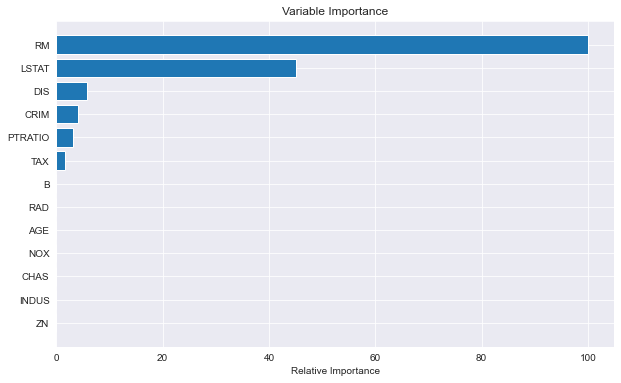

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')
plt.figure(figsize = (10,6))
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, boston.feature_names[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [32]:
from sklearn.model_selection import GridSearchCV
LR = {'learning_rate':[0.15,0.1,0.10,0.05], 'n_estimators':[100,150,200,250]}

tuning = GridSearchCV(estimator =GradientBoostingRegressor(), 
            param_grid = LR, scoring='r2')
tuning.fit(X_train,y_train)
tuning.best_params_, tuning.best_score_

({'learning_rate': 0.1, 'n_estimators': 200}, 0.8552574499620625)